
# Procesamiento y análisis de información textual

En esta práctica revisaremos y aplicaremos los conocimientos aprendidos en los módulos 1, 2 y 3. Concretamente trataremos 5 temas.

<ul>
<li>1. Preparación del dataset: pre-procesamiento de texto.
<li>2. Obtención de datos a partir de información textual.
<li>3. Detección de tópicos.
<li>4. Clasificación de textos.
<li>5. Evaluación: comparación de modelos y discusión de resultados.
</ul>
    
El <b>propósito</b> de la práctica es descubrir rasgos característicos de un conjunto de reseñas de productos de software de <i>Amazon</i>, utilizando las técnicas explicadas y ver si es posible clasificar automáticamente una opinión como positiva o negativa con métodos de machine learning.

<b> Descripción del Dataset</b>

- Título: Amazon Review Data

- Fuente: https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/#complete-data

 Utilizaremos un subconjunto de las reseñas disponibles en el dataset <i>Software</i>, el cual contiene opiniones realizadas por los clientes a diferentes productos de software disponibles en Amazon. El dataset original tiene 459.436 instancias, aunque en esta práctica vamos a trabajar con menos del 5% de ellas.

En cuanto a la estructura del dataset, éste tiene 12 atributos:

- <b>overall</b>: rating o calificación del producto; el valor va desde 1 (insatisfecho), hasta 5 (satisfecho).<br>
- <b>verified</b>: indica si el mensaje ha sido verificado.<br>
- <b>reviewTime</b>: fecha de la reseña (sin procesar).<br>
- <b>reviewerID</b>: ID del revisor, por ejemplo A2SUAM1J3GNN3B.<br>
- <b>asin</b>: ID del producto, p. 0000013714.<br>
- <b>style</b>: diccionario de los metadatos del producto; por ejemplo, "Platform": "Mac".<br>
- <b>reviewerName</b>: nombre del revisor.<br>
- <b>reviewText</b>: texto de la reseña.<br>
- <b>summary</b>: resumen de la reseña.<br>
- <b>unixReviewTime</b>: fecha de la reseña (en formato Unix).<br>
- <b>vote</b>:votos útiles de la revisión <br>
- <b>image</b>: imágenes que los usuarios publican después de haber recibido el producto.<br>

In [66]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# 1. Preparación del dataset: pre-procesamiento de texto 


En este primer apartado realizaremos la carga del dataset original, seleccionaremos un subconjunto de las instancias y prepararemos (limpieza) el texto de las reseñas antes de realizar el análisis.



## 1.1 Carga y creación del dataset:

In [67]:
import pandas as pd

# Cargamos el archivo de reseñas:
df = pd.read_csv('Amazon_software.csv', encoding = "ISO-8859-1")

df = pd.DataFrame(df)
print('Tamaño del dataset', df.shape)

df.sample(5, random_state=42)


Tamaño del dataset (15000, 12)


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
11499,5.0,False,"04 8, 2009",A2CNXL7UGZYFG4,B000QO76HU,NaN,E. HOFFMAN,STOP RIGHT THERE ! This is a real review that is not motivated by deception.\nThe simple four (4) rules that YNAB software helps you follow is the combination that ha...,YNAB - WHY IT CHANGED MY LIFE - APRIL 2009,1239148800,2.0,NaN
6475,5.0,False,"09 4, 2008",A3EZD11AFUX23K,B0017I8NQM,NaN,Jason P. Gold,Please see [...] for a comparison of the features in pre-ribbon versions of Word to WordPerfect. It is enlightening!\n\nIt is hard to believe it is two years since C...,The Better Wordprocessor,1220486400,12.0,NaN
13167,2.0,True,"10 2, 2013",A2H7NSYY9Q1UJZ,B000GD5DS0,NaN,Wallace Pierce,"Just did not fit my needs. My computer crashed & I had to replace my money program, so I ordered the 2007 version thinking it might be an improvement. It was an imp...",My opinion of the Money 2007 Deluxe version.,1380672000,NaN,NaN
862,4.0,True,"06 28, 2015",A1XJ7XUR2W0J8V,B00RKZKFUI,NaN,Jerry De La Cruz,Everything this little program does can be done yourself with some programming in your word processor. But why bother; this thing does it simply and intuitively. Th...,The optional little graphics are a nice touch. Make sure you use a blank sheet ...,1435449600,NaN,NaN
5970,5.0,False,"08 13, 2018",A6OUFMC6D07OF,B0144NYGJY,{'Platform:': ' Key Card [12 month]'},Barry,worked and useful as described,worked and useful as described,1534118400,NaN,NaN


Para realizar la práctica, sólo necesitaremos los textos de las reseñas y las calificaciones. Por tanto, eliminaremos las columnas innecesarias y nos quedaremos solo con las columnas <b>overall</b> y <b>reviewText</b>.

In [68]:
#Expandir la visualización de la columna de reseñas:
pd.set_option('display.max_colwidth', 170)

#Seleccionamos las columnas con las que trabajaremos:
df = df[['overall', 'reviewText']] # calificación de la reseña y texto de la reseña.

#Presentar 5 elementos de datos:
df.sample(5, random_state = 42)

,overall,reviewText
11499,5.0,STOP RIGHT THERE ! This is a real review that is not motivated by deception.\nThe simple four (4) rules that YNAB software helps you follow is the combination that ha...
6475,5.0,Please see [...] for a comparison of the features in pre-ribbon versions of Word to WordPerfect. It is enlightening!\n\nIt is hard to believe it is two years since C...
13167,2.0,"Just did not fit my needs. My computer crashed & I had to replace my money program, so I ordered the 2007 version thinking it might be an improvement. It was an imp..."
862,4.0,Everything this little program does can be done yourself with some programming in your word processor. But why bother; this thing does it simply and intuitively. Th...
5970,5.0,worked and useful as described


<Axes: >

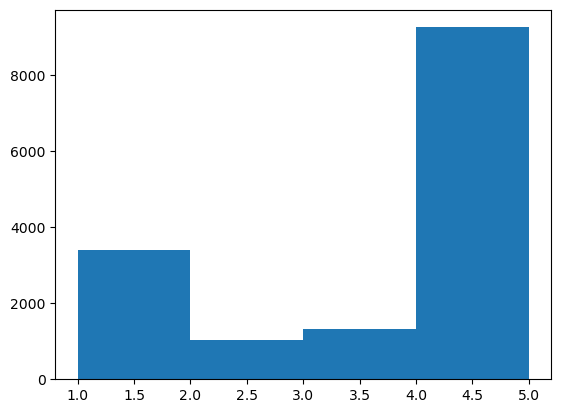

In [69]:
#Graficamos un histograma para tener una idea de la distribución de las reseñas numéricas:
df.overall.hist(bins=[1.0, 2.0, 3.0, 4.0, 5.0], grid=False)

Como observamos en el histograma, hay más calificaciones positivas (de 4 puntos o más), que negativas (de 1 y 2 puntos). En la siguiente tabla veamos cuál es la tasa de votaciones por cada nivel de rating.

In [70]:
# Distribución de calificaciones por ubicación:
df['overall'].value_counts(normalize=True) * 100 # valor porcentual

overall
5.0    46.226667
1.0    22.606667
4.0    15.546667
3.0     8.766667
2.0     6.853333
Name: proportion, dtype: float64

La tabla anterior indica que, aproximadamente 1 de cada 2 clientes de Amazon han asignado la máxima puntuación (5.0) a los productos de software o tecnología. Mientras que 1 de cada 4 clientes han asignado la peor calificación posible (1.0).

Para la clasificación de textos, necesitaremos sólo las opiniones que tienen las calificaciones más altas y las más bajas, por ello, vamos a seleccionar las filas que cumplan con estas características.

Las opiniones cuya calificación sea mayor que 3 serán etiquetadas con '1'; mientras que, etiquetaremos con '0' las opiniones que tengan una calificación menor a 3. Las etiquetas se asignan a la columna <b>sentiment</b>.

In [71]:
# Descartar reseñas neutrales (calificación = 3)
cond = df['overall'] != 3
df = df.loc[cond] # Filtrar

# Creación de una nueva columna: sentiment
df.loc[:,('sentiment')] = df['overall'].apply(lambda x : 1 if x > 3 else 0).copy()

# Imprimir número de calificaciones por clase.
print('NÚMERO DE CALIFICACIONES POR CLASE:\n', df.sentiment.value_counts())
print("\nTamaño total del dataset", df.shape, "\n")

NÚMERO DE CALIFICACIONES POR CLASE:
 sentiment
1    9266
0    4419
Name: count, dtype: int64

Tamaño total del dataset (13685, 3) 



Como observamos en el output anterior, luego de aplicar el filtro queddan 13685 instancias, de las cuales, aprox. el 32% de reseñas tienden a tener una connotación o sentimiento negativo, y el 68% son positivas.

Para la clasificación de textos (Parte 4) vamos a trabajar con el dataset desbalanceado, pero, para la parte final de la práctica, haremos un ajuste para crear un modelo predictivo con una versión del dataset balanceado y veremos qué ocurre con las predicciones.

Ahora continuemos con la exploración de las reseñas para ver qué otras tareas de preparación tenemos que realizar.

In [72]:
# Muestra de clalificaciones: (1, sentimiento positivo) y (0, sentimiento negativo)
df.sample(5, random_state = 8)

,overall,reviewText,sentiment
11725,5.0,Just got to say the seller sold this to me at an amazing price. I used the license serial number to renew my 3 PC's for a 1/3 of the cost of doing it online. Woo Hoo!,1
4532,4.0,The download of a)the Amazon required downloader and then b) the actual program in multiple steps went OK but for another $[...] bucks or so you can get the actual pa...,1
6339,5.0,Was recommended by my graphic designer so I could view and make small changes without going over my graphic design budget!,1
6520,2.0,"Slow. Get lots of ""flashing"" hourglass cursors when making entries. Same as older products, but only have to by to keep download function.",0
628,1.0,Not to gd,0


Como observamos en el dataset creado, algunas reseñas son muy poco comunicativas (como "Not to gd"), por lo tanto, vamos a filtrar aquellas con menos de 5 palabras.

In [73]:
print("CANTIDAD TOTAL DE REVIEWS ANTES DEL FILTRADO:", df.shape[0], "\n")

def words_counter(text):
    if type(text) != float:
      return len(text.split()) # contar palabras de cada reseña
    else:
      return None

#Descartar reseñas muy cortas: inferior a 5 palabras:
df = df[df['reviewText'].apply(words_counter) >= 5]
print("CANTIDAD TOTAL DE REVIEWS DESPUÉS DEL FILTRADO:", df.shape[0])


# Imprimir número de calificaciones por clase.
print('NÚMERO DE CALIFICACIONES POR CLASE:\n', df.sentiment.value_counts())
print("\nTamaño total del dataset", df.shape, "\n")

CANTIDAD TOTAL DE REVIEWS ANTES DEL FILTRADO: 13685 

CANTIDAD TOTAL DE REVIEWS DESPUÉS DEL FILTRADO: 12314
NÚMERO DE CALIFICACIONES POR CLASE:
 sentiment
1    8037
0    4277
Name: count, dtype: int64

Tamaño total del dataset (12314, 3) 



Como observamos en el output anterior, de las 13.685 reseñas etiquetadas, luego del filtrado quedan 12.314 reseñas.

## 1.2 Limpieza de texto:
Antes de trabajar con los textos de las reseñas, hay que limpiarlos. Exploremos el tercer comentario para identificar qué tareas de limpieza necesitamos aplicar:

In [74]:
df.iloc[12][1]

'I\'ve used TurboTax since 1994.  This year they\'ve clearly demonstrated their elitest attitude and how they really feel about their suckers, er customers.  I only do a couple stock trades a year and for that I\'m forced to buy the Premier version ?!?!?  I decided to go with the <a data-hook="product-link-linked" class="a-link-normal" href="/Deluxe-package-from-H-R-Block/dp/B00PJPI6G6/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">Deluxe package from H&R Block</a> and it truly is Deluxe.  All the federal forms, 5 fed efiles (lets you prepare unlimited returns for family and friends), and state return on CD all for $25.  It imported last year\'s TurboTax file quickly and accurately and worked great.  I\'m switched for life.'

El ejemplo presentado, nos permite observar que necesitamos quitar algunos signos de puntuación y limpiar código HTML. Por ahora, dejaremos pendiente a estas tareas para realizarlo más adelante.

Además, si continuamos con la exploración un del dataset, observamos que algunos textos contienen direcciones web.


In [75]:
#Presentar la primera reseña que incluye una dirección web:
df[df['reviewText'].str.contains('http', case=False, na=False)].iloc[0][1]


'https://www.amazon.com help me a lot with my collection in my diary of my listening to music'



**Filtraje de direcciones web**:

Agrega una columna al dataframe que se denomine <i>text</i> e implementa una función que a partir del contenido de <i>reviewText</i>, quite las direcciones web de los textos.


<b>Salida esperada:</b> Enlista al menos una reseña que muestre que la función implementada funciona.

</div>



In [76]:
import pandas as pd
import re


# Función para remover URLs usando expresiones regulares
def remove_urls(text):
    # Definición de una expresión regular para encontrar URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # Reemplazar las URLs encontradas por un espacio vacío
    return url_pattern.sub(r'', text)

# Crear una nueva columna 'text' aplicando la función para eliminar URLs
df['text'] = df['reviewText'].apply(lambda x: remove_urls(x) if x is not None else x)

# Ahora, para demostrar que la función ha funcionado, vamos a comparar el texto antes y después del filtrado en una instancia específica.
# Para ello, seleccionaremos una reseña que sabemos que contiene una URL.

# Ejemplo antes del filtrado
print("ANTES DEL FILTRADO:\n", df.loc[df['reviewText'].str.contains('http', case=False, na=False)].iloc[0]['reviewText'], "\n")

# Ejemplo después del filtrado
print("DESPUÉS DEL FILTRADO:\n", df.loc[df['reviewText'].str.contains('http', case=False, na=False)].iloc[0]['text'], "\n")


ANTES DEL FILTRADO:
 https://www.amazon.com help me a lot with my collection in my diary of my listening to music 

DESPUÉS DEL FILTRADO:
  help me a lot with my collection in my diary of my listening to music 



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
En este **segundo paso de la limpieza de datos**, se construye una función que convierta el texto que contiene contracciones (una contracción es la forma abreviada de una palabra, como "don't") a su forma completa (como, "do not"). La expansión de las contracciones puede ser útil para mejorar la identificación de stopwords.
<br>
<br>
<b>Salida esperada:</b> Enlista la siguiente reseña, evidenciando que las contracciones han sido extendidas. *Ejemplo de la salida esperada*:
<br>
<i>"I do not really know why there were so many complaints about Windows 8. I got this in 2013 and had no problem since them. All you have to do is add on a free start button utility and it works pretty much like windows has always worked. Of course now that Windows 10 is out, maybe that is a moot point."</i>

</div>

In [77]:
#Observemos el texto con contracciones ("don't", "that's"). Luego evidencia cómo éste cambia luego de la transformación:
df.iloc[1][3]

"I don't really know why there were so many complaints about Windows 8. I got this in 2013 and had no problem since them. All you have to do is add on a free start button utility and it works pretty much like windows has always worked. Of course now that Windows 10 is out, maybe that's a moot point"

In [78]:
import re

# Mapeo de contracciones a sus formas expandidas
contractions_mapping = {
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "hasn't": "has not",
    "haven't": "have not",
    "hadn't": "had not",
    "won't": "will not",
    "wouldn't": "would not",
    "can't": "cannot",
    "couldn't": "could not",
    "shouldn't": "should not",
    "mightn't": "might not",
    "mustn't": "must not",
    "I'm": "I am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "it's": "it is",
    "we're": "we are",
    "they're": "they are",
    "I've": "I have",
    "you've": "you have",
    "we've": "we have",
    "they've": "they have",
    "I'd": "I would",
    "you'd": "you had",
    "he'd": "he had",
    "she'd": "she had",
    "we'd": "we had",
    "they'd": "they had",
    "I'll": "I will",
    "you'll": "you will",
    "he'll": "he will",
    "she'll": "she will",
    "we'll": "we will",
    "they'll": "they will",
}

# Función para expandir contracciones en el texto
def expand_contractions(text, contractions_dict=contractions_mapping):
    # Para cada contracción y su expansión en el diccionario
    for contraction, expansion in contractions_dict.items():
        # Usar expresiones regulares para reemplazar la contracción con su expansión
        text = re.sub(r"\b{}\b".format(contraction), expansion, text, flags=re.IGNORECASE)
    return text

# Simulando un ejemplo de texto con contracciones
example_text = "I don't really know why there were so many complaints about Windows 8. I got this in 2013 and hadn't had any problem since then. All you have to do is add on a free start button utility and it works pretty much like windows has always worked. Of course now that Windows 10 is out, maybe that's a moot point."

# Aplicando la función al ejemplo de texto
expanded_text = expand_contractions(example_text)

print(expanded_text)

I do not really know why there were so many complaints about Windows 8. I got this in 2013 and had not had any problem since then. All you have to do is add on a free start button utility and it works pretty much like windows has always worked. Of course now that Windows 10 is out, maybe that's a moot point.


Como ya lo comprobamos, otra tarea de limpieza que el dataset necesita es la limpieza de código HTML de los textos. Veamos el siguiente ejemplo:

In [79]:
df.iloc[140][3] #A7D4E7F9EKSI9

#Presentar la tercera reseña que incluye una dirección web, luego de la limpieza:
df[df['text'].str.contains('This was FRAUD.', case=False, na=False)].iloc[0][3]

'This was FRAUD.  CD already registered per intuit<a data-hook="product-link-linked" class="a-link-normal" href="/QuickBooks-Pro-2009-OLD-VERSION/dp/B001ECGT8A/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">QuickBooks Pro 2009 [OLD VERSION</a>]'

Como observamos en el ejemplo, el texto de la reseña contiene la etiqueta de enlace. A través de la siguiente función vamos a quitar cualquier fragmento de código HTML de las reseñas.

In [80]:
from bs4 import BeautifulSoup

def html_links_remove(text):
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    return text

# Aplicar la función.
df['text']=df['text'].apply(lambda x:html_links_remove(x))

#Presentar la tercera reseña que tenía una dirección web. Luego de la limpieza queda:
df[df['text'].str.contains('This was FRAUD.', case=False, na=False)].iloc[0][3]

/var/folders/p5/jp6dx55n0tl16f0fwb0jj6t00000gn/T/ipykernel_5380/160081010.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


'This was FRAUD.  CD already registered per intuitQuickBooks Pro 2009 [OLD VERSION]'

Ahora completaremos una tarea que la dejamos pendiente: quitar ciertos signos de puntuación.

In [81]:
import string

punctuation = ';,!"#$%&\()*+-<>@[\\]^_`{|}~?'

# Función para reemplazar ciertos signos de puntuación:
def clean_signs(text):
    text = re.sub('[%s]' % re.escape(punctuation), ' ', text)
    return text

# Aplicar la función a la columna 'Review_Text'
df['text'] = df['text'].apply(clean_signs)

df.iloc[12].text # Presentamos una reseña para ver cómo va quedando el texto preprocesado.

"I've used TurboTax since 1994.  This year they've clearly demonstrated their elitest attitude and how they really feel about their suckers  er customers.  I only do a couple stock trades a year and for that I'm forced to buy the Premier version        I decided to go with the Deluxe package from H R Block and it truly is Deluxe.  All the federal forms  5 fed efiles  lets you prepare unlimited returns for family and friends   and state return on CD all for  25.  It imported last year's TurboTax file quickly and accurately and worked great.  I'm switched for life."

Finalmente, observamos en el ejemplo que hay espacios doble, así que vamos a crear una función para eliminarlos:

In [82]:
import re

class ExtraSpacesReplacer(object):
    """ Replaces extra spaces in a text.
    >>> replacer = ExtraSpacesReplacer()
    """

    def replace(self, text):
        s = text
        s = re.sub('\s\s+', ' ', s)
        return s.strip()

spaces_replacer = ExtraSpacesReplacer()

df['text'] = df['text'].apply(spaces_replacer.replace)

df.iloc[12][3] # Reseña luego de la limpieza

"I've used TurboTax since 1994. This year they've clearly demonstrated their elitest attitude and how they really feel about their suckers er customers. I only do a couple stock trades a year and for that I'm forced to buy the Premier version I decided to go with the Deluxe package from H R Block and it truly is Deluxe. All the federal forms 5 fed efiles lets you prepare unlimited returns for family and friends and state return on CD all for 25. It imported last year's TurboTax file quickly and accurately and worked great. I'm switched for life."

# 2. Obtención de datos a partir de información textual

## 2.1 Encontrar colocaciones

Recordemos que las colocaciones son términos multipalabra, es decir, secuencias de palabras que, en conjunto, tienen un significado que difiere significativamente del significado de cada palabra individual (e.g."Internet Security").


Calculamos los mejores bigramas y trigramas de las opiniones .
  

In [83]:
# Para este apartado es necesario cargar las siguientes librerías:
import nltk
nltk.download('all')
from nltk import pos_tag, word_tokenize
from nltk.collocations import *

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/alex/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /Users/alex/nltk_data

In [84]:
#Importar la lista de stopwords en inglés de la libreria NLTK y agregamos algunas adicionales:
stopwords =  ["could", "cup"]#
stopwords = stopwords + nltk.corpus.stopwords.words('english')
# extracto de stopwords.
[ x for x in stopwords[:20]]

['could',
 'cup',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he']

A partir del comando help(nltk.collocations.BigramAssocMeasures) explora la clase BigramAssocMeasures del módulo nltk.metrics.association y revisa las definiciones de las métricas de Likelihood Ratio (likelihood_ratio) y de Pointwise Mutual Information (pmi) se explica en el capítulo 5 del libro Foundations of Statistical Natural Language Processing (Manning & Schutze).

In [85]:
help(nltk.collocations.BigramAssocMeasures)

Help on class BigramAssocMeasures in module nltk.metrics.association:

class BigramAssocMeasures(NgramAssocMeasures)
 |  A collection of bigram association measures. Each association measure
 |  is provided as a function with three arguments::
 |  
 |      bigram_score_fn(n_ii, (n_ix, n_xi), n_xx)
 |  
 |  The arguments constitute the marginals of a contingency table, counting
 |  the occurrences of particular events in a corpus. The letter i in the
 |  suffix refers to the appearance of the word in question, while x indicates
 |  the appearance of any word. Thus, for example:
 |  
 |  - n_ii counts ``(w1, w2)``, i.e. the bigram being scored
 |  - n_ix counts ``(w1, *)``
 |  - n_xi counts ``(*, w2)``
 |  - n_xx counts ``(*, *)``, i.e. any bigram
 |  
 |  This may be shown with respect to a contingency table::
 |  
 |              w1    ~w1
 |           ------ ------
 |       w2 | n_ii | n_oi | = n_xi
 |           ------ ------
 |      ~w2 | n_io | n_oo |
 |           ------ ------
 |  

Para categorizar a los tokens por su tag POS, primero vamos a convertir el texto a minúsculas:

In [86]:
#Creamos texto en minúscula que recoja todas las reseñas:

opinions = " ".join(df['text']).lower()
opinions[:250]

'we run a top of the line system utilizing windows 10 pro. i personally tried to get this to work. when you click the application file as per the directions on the back of the case our entire system would bog down and have to be reset. i let it just s'

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
**Primer paso**:
<br>
Obtenemos los tokens del texto de las reseñas. Etiqueta estos tokens por su PoS.
<br>
Utiliza los métodos *word_tokenize* para tokenizar el texto de las reseñas y  *pos_tag* para determinar la etiqueta de cada token.
<br>

<b>Salida esperada:</b> Imprime los diez primeros tokens, con su respectiva etiqueta:
</div>

In [87]:
# Tokenizar el texto
tokens = word_tokenize(opinions)

# Etiquetar los tokens con su PoS
pos_tokens = pos_tag(tokens)

# Imprimir los diez primeros tokens con su respectiva etiqueta PoS
print(pos_tokens[:10])

[('we', 'PRP'), ('run', 'VBP'), ('a', 'DT'), ('top', 'NN'), ('of', 'IN'), ('the', 'DT'), ('line', 'NN'), ('system', 'NN'), ('utilizing', 'JJ'), ('windows', 'VBZ')]


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
**Segundo paso**: Calcula los 500 mejores bigramas y los 500 mejores trigramas a partir de los tokens etiquetados (e.g. [(we, PRP), ...]) del texto. Utiliza las métricas PMI y Likehood Ratio.


<b>Condición</b>: De los 500 bigramas y trigramas, elige a los que no comienzan ni terminen con una stopword. Para el filtrado de stopwords considera:
- La lista previamente cargada (desde el paquete NLTK), y
- Las categorías POS que representan a palabras vacías como determinantes, preposiciones, entre otras.

<br>
<b>Salida esperada:</b> Imprime los primeros 20 n-grams obtenidos con cada métrica.
</div>
  

Recordemos la clasificación de etiquetas PoS.

<b>Etiquetas PoS</b>

<ul>
<li>DT: Determinante</li>
<li>JJ: Adjetivo</li>
<li>NN: Nombre en singular</li>
<li>NNS: Nombre en plural</li>
<li>VBD: Verbo en pasado</li>
<li>VBG: Verbo en gerundio</li>
<li>MD: Verbo modal</li>
<li>IN: Preposición o conjunción subordinada</li>
<li>PRP: Pronombre</li>
<li>RB: Adverbio</li>
<li>RP: Partícula</li>    
<li>CC: Conjunción coordinada</li>
<li>CD: Numeral</li>
</ul>

In [88]:
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures


#Cargamos las métricas para el cálculo de bigramas y trigramas:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

# Función para determinar si un n-grama es válido según las condiciones especificadas
def valid_ngram(ngram):
    # Lista de etiquetas PoS que representan palabras vacías o funcionales
    bad_tags = {'DT', 'IN', 'PRP$', 'RB', 'PRP', 'MD', 'WP', 'WRB', 'WDT', 'EX', 'PDT', 'RP', 'CC', 'UH', 'CD'}
    # Verifica si el primer y último token del n-grama son válidos
    first_word, last_word = ngram[0], ngram[-1]
    return (first_word[0].lower() not in stopwords and 
            last_word[0].lower() not in stopwords) and (first_word[1] not in bad_tags and last_word[1] not in bad_tags)

# Crear buscadores de collocations para bigramas y trigramas
bigram_finder = BigramCollocationFinder.from_words(pos_tokens)
trigram_finder = TrigramCollocationFinder.from_words(pos_tokens)

# Filtrar bigramas y trigramas que no cumplen con las condiciones
bigram_finder.apply_ngram_filter(lambda w1, w2: not valid_ngram((w1, w2)))
trigram_finder.apply_ngram_filter(lambda w1, w2, w3: not valid_ngram((w1, w2, w3)))

# Calcular y mostrar los 500 mejores bigramas y trigramas con ambas métricas
best_500_bigrams_pmi = bigram_finder.nbest(BigramAssocMeasures.pmi, 500)
best_500_bigrams_lr = bigram_finder.nbest(BigramAssocMeasures.likelihood_ratio, 500)
best_500_trigrams_pmi = trigram_finder.nbest(TrigramAssocMeasures.pmi, 500)
best_500_trigrams_lr = trigram_finder.nbest(TrigramAssocMeasures.likelihood_ratio, 500)

# Imprimir los primeros 20 n-grams de cada lista
print("20 mejores bigramas con PMI:")
for bigram in best_500_bigrams_pmi[:20]:
    print(bigram)
    
print("\n20 mejores bigramas con Likelihood Ratio:")
for bigram in best_500_bigrams_lr[:20]:
    print(bigram)

print("\n20 mejores trigramas con PMI:")
for trigram in best_500_trigrams_pmi[:20]:
    print(trigram)
    
print("\n20 mejores trigramas con Likelihood Ratio:")
for trigram in best_500_trigrams_lr[:20]:
    print(trigram)

20 mejores bigramas con PMI:
(("'not", 'NNP'), ('valid', 'NNP'))
(("'restart", 'NNP'), ('app.scpt', 'NN'))
(("'w2/1099", 'POS'), ('reporter', 'NN'))
(("'wedding", 'VBG'), ('rehearsal', 'NN'))
(('.o1', 'JJ'), ('entires', 'NNS'))
(('/s3d', 'NNP'), ('stereoscopic', 'NN'))
(('/watch', 'JJ'), ('v=vrtqyte94bo', 'NN'))
((':0', 'NN'), ('definitley', 'NN'))
((':invalidaterect', 'NN'), ('hwnd=null', 'NN'))
(('==additional', 'JJ'), ('features==', 'NN'))
(('==font', 'NNP'), ('rendering==', 'NN'))
(('==new', 'VB'), ('skins==', 'JJ'))
(('abrasive', 'JJ'), ('screeching', 'VBG'))
(('absurdy', 'JJ'), ('inintuitive', 'JJ'))
(('ac3', 'JJ'), ('dts', 'NN'))
(('accuratley', 'VB'), ('depict', 'NN'))
(('actualizar', 'JJ'), ('mi', 'NN'))
(('adams', 'NNS'), ('terry', 'VBP'))
(('afs5sersg6rat5sgar', 'NN'), ('arad', 'NN'))
(('ag', 'JJ'), ('createacard', 'JJ'))

20 mejores bigramas con Likelihood Ratio:
(('.', '.'), ('.', '.'))
(('turbo', 'JJ'), ('tax', 'NN'))
(('r', 'NN'), ('block', 'NN'))
(('customer', 'NN'), ('

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**Análisis**: Observa las salidas que genera cada métrica (PMI vs. Likehood Ratio) y explica por qué se generan las diferencias y cuál métrica genera los mejores n-gramas desde el punto de vista del dominio.


  


En el contexto "opiniones realizadas por los clientes a diferentes productos de software disponibles en Amazon", el análisis de las salidas de cada métrica revela diferencias significativas en los tipos de n-gramas que cada una. La elección de la mejor métrica depende del objetivo del análisis. 


**Análisis de los N-gramas con PMI**  
Los n-gramas con PMI altos son valiosos para detectar discusiones detalladas o técnicas. Sin embargo, pueden no ser tan útiles para capturar la esencia general de las reseñas o para identificar temas ampliamente relevantes para la mayoría de los usuarios. Por ejemplo:  
* `(('ac3', 'JJ'), ('dts', 'NN'), ('passthrough', 'NN'))`: Este trigram es muy específico y probablemente relacionado con términos técnicos de audio. La especificidad indica que 'ac3' y 'dts passthrough' son conceptos técnicos probablemente no comunes fuera de contextos especializados.  

* `(('actualizar', 'JJ'), ('mi', 'NN'), ('archos', 'VBD'))`: Aquí se combina un verbo en español ('actualizar') con un nombre propio ('archos'), lo que sugiere una discusión técnica sobre un producto específico, posiblemente en un contexto de soporte o actualización de software.


**Análisis de los N-gramas con Likelihood Ratio**  
Los n-gramas generados tienden a ser más generales y reflejar experiencias o acciones comunes mencionadas en las reseñas. En este contexto quizás tiende a ofrecer una visión más clara de las experiencias y opiniones compartidas por los usuarios. Por ejemplo:  

* `(('.', '.'), ('i', 'NN'), ("'ve", 'VBP'))`: Estos trigramas reflejan acciones comunes en las reseñas, como haber comprado algo. Aunque la presencia de puntos (.) puede parecer menos informativa, el enfoque en acciones comunes como 'bought' (comprado) o 'used' (usado) refleja patrones de lenguaje comunes en las reseñas.  

* `(('easy', 'JJ'), ('to', 'TO'), ('use', 'VB'))`: Este trigram claramente captura una opinión común en las reseñas, destacando la facilidad de uso de un producto, un tema muy relevante para potenciales consumidores.  

La diferencia clave entre las métricas, entonces, radica en su enfoque: PMI destaca lo específico y potencialmente único, mientras que Likelihood Ratio tiende a enfocarse en lo común y ampliamente relevante. Dependiendo del objetivo de análisis (identificar temas generales vs. explorar detalles técnicos o específicos), elegiríamos la métrica que mejor se alinee con nuestro objetivos.

---

 <br>
 <br>

Ahora detectamos n-gramas que cumplen el patrón sintáctico de un sintagma nominal (e.g: adjetivo + nombre en singular/plural, nombre + nombre y nombre en singular/plural). Las palabras componentes de cada n-grama deben estar separdaas por un guión "-". 

<br>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<b>Salida esperada:</b> Lista de los 20 primeros n-gramas que cumplan el patrón sintáctico, como 'line_system' y 'minutes'.

</div>

In [89]:
# Lista de n-gramas que cumplen con los patrones sintácticos deseados
matching_ngrams = []

# Patrones sintácticos deseados en términos de etiquetas PoS
desired_patterns = [
    ('JJ', 'NN'), ('JJ', 'NNS'),  # Adj + Nombre singular/plural
    ('NN', 'NN'), ('NNS', 'NN'), ('NN', 'NNS'), ('NNS', 'NNS')  # Nombre + Nombre (combinaciones)
]

# Buscar n-gramas que coincidan
for ngram in best_500_bigrams_pmi + best_500_bigrams_lr:
    pos_pattern = tuple(tag for word, tag in ngram) # Convertir ngrama a formato de etiquetas PoS
    if pos_pattern in desired_patterns:             # Verificar si el patrón coincide con alguno de los deseados
        # Formatear ngrama para unir palabras con guión y agregar a la lista de coincidencias
        formatted_ngram = '-'.join(word for word, tag in ngram)
        matching_ngrams.append(formatted_ngram)


# Eliminar duplicados manteniendo el orden
from collections import OrderedDict
matching_ngrams = list(OrderedDict.fromkeys(matching_ngrams))

# Imprimir los primeros 20 n-gramas que cumplen con el patrón
print("Los primeros 20 n-gramas que cumplen con el patrón sintáctico son:")
for ngram in matching_ngrams[:20]:
    print(ngram)


Los primeros 20 n-gramas que cumplen con el patrón sintáctico son:
.o1-entires
/watch-v=vrtqyte94bo
:0-definitley
:invalidaterect-hwnd=null
==additional-features==
ac3-dts
actualizar-mi
afs5sersg6rat5sgar-arad
alaska-homesteader
alex-armani
alibre-deltacad
alice-springs
alif-baa
alto-saxophone
ami-officewriter
andriod-fanboy
apagar-manualmente
apis-improve
arad-ag
archicad-plotmaker


**Detectamos colocaciones con un modelo de detección de frases, con el módulo Phraser de Gensim. Entrena el modelo con todas las opiniones.**


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer Paso: </i> Crear la lista de sentences.


In [90]:
#Crear la lista de sentences:
opinions_string = " ".join(df['text'])

opinion_sentences = opinions_string.split('. ')

opinion_sentences[:10]


['We run a top of the line system utilizing Windows 10 Pro',
 'I personally tried to get this to work',
 'When you click the application file as per the directions on the back of the case our entire system would bog down and have to be reset',
 "I let it just sit once to see if it ever started and after about 20 minutes all these windows started popping up saying that the file required a version of Adobe that doesn't exist and that the wrong volume was inserted",
 'Now we are taking all our computers off line to do a complete virus scan just in case',
 'Avoid',
 "At the least it's a headache and a waste of time and money",
 "I don't really know why there were so many complaints about Windows 8",
 'I got this in 2013 and had no problem since them',
 'All you have to do is add on a free start button utility and it works pretty much like windows has always worked']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Convierte las reseñas en una lista de *phrases*. 
* Las phrases no deben ser stopwords. 
* Tampoco deben empezar ni acabar con una stopword. 
* Utiliza la lista de stopwords para el filtrado.

<br>
<b> Salida esperada:</b> Lista de las 20 primeras *phrases* que no sean, o no contengan stopwords.

</div>

In [91]:
from gensim.models.phrases import Phrases, Phraser
import gensim.utils

# Tokenizar cada oración y filtrar stopwords
sentences_tokenized = [[word for word in gensim.utils.simple_preprocess(sentence) if word not in stopwords] 
                       for sentence in opinion_sentences]

# Entrenar el modelo Phrases
phrases = Phrases(sentences_tokenized, min_count=1, threshold=1)
phraser = Phraser(phrases)

# Generar las phrases a partir de las oraciones tokenizadas
phrases_list = [phraser[sentence] for sentence in sentences_tokenized]

# Filtrar phrases que no comiencen ni terminen con stopwords, y que no contengan stopwords
opinion_phrases_no_stopwords = []
for sentence in phrases_list:
    for phrase in sentence:
        if "_" in phrase:  # Verificar si la palabra es una phrase
            words = phrase.split("_")
            if words[0] not in stopwords and words[-1] not in stopwords and all(word not in stopwords for word in words):
                opinion_phrases_no_stopwords.append(phrase)

# Imprimir las primeras 20 phrases que cumplen con los criterios
for x in opinion_phrases_no_stopwords[:20]:
    print(x)


top_line
windows_pro
personally_tried
get_work
click_application
file_per
entire_system
see_ever
started_popping
file_required
version_adobe
virus_scan
least_headache
waste_time
really_know
many_complaints
got_problem
start_button
works_pretty
much_like


## 2.2 Vectorizar palabras y términos

Exploraremos la vectorización de palabras y términos con el método Word2Vec.

Recordemos que el paquete gensim implementa un método para entrenar modelos Word2Vec.

In [92]:
import gensim

# opinion_phrases_no_stopwords = filtered_phrases  # Esta sería la lista obtenida previamente

# Quitar espacios del texto:
opinion_phrases_stripped_no_stopwords = [c.strip() for c in opinion_phrases_no_stopwords]
opinion_phrases_stripped_no_stopwords[:10]

['top_line',
 'windows_pro',
 'personally_tried',
 'get_work',
 'click_application',
 'file_per',
 'entire_system',
 'see_ever',
 'started_popping',
 'file_required']


**Obtenemos targets de las opiniones y sus aspectos utilizando el modelo word2vec.**


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer paso</i>: Convertir las phrases de cada oración en un token. Lo haremos concatenando los tokens de la phrase con el caracter '_' 
* (e.g: 'disneyland hongkong' -> 'disneyland_hongkong'). 
  Entonces, en cada oración sustituimos los bigramas que son phrases por la forma tokenizada 
* (e.g: we've been to disneyland hongkong -> we've been to disneyland_hongkong). 

De esta forma, las colocaciones formarán parte del vocabulario del modelo word2vec que generaremos.

In [93]:
from nltk.util import ngrams

collocation_phrases = [phrase for phrase in list(set(opinion_phrases_stripped_no_stopwords)) if ' ' in phrase]

def transform_sentence(sentence):
    transformed_sentence = sentence
    n_grams = list(ngrams(nltk.word_tokenize(sentence), 2))
    ngrams_t = [' '.join(gram) for gram in n_grams]
    for ngram in ngrams_t:
        if ngram in collocation_phrases:
            opt = ngram.replace(' ', '_')
            transformed_sentence = transformed_sentence.replace(ngram,opt)
    return transformed_sentence

opinion_sentences_transformed = [transform_sentence(os) for os in opinion_sentences]

opinion_sentences_transformed[:3][:200]

['We run a top of the line system utilizing Windows 10 Pro',
 'I personally tried to get this to work',
 'When you click the application file as per the directions on the back of the case our entire system would bog down and have to be reset']



<i>Segundo paso</i>: Crea una sentence stream donde todos los tokens de las oraciones están lematizados. 
* Los tokens no pueden ser stopwords ni tener un stopword al inicio o al final. 
* Para simplificar la tarea, consideramos que el lema de una colocación no cambia y su PoS es 'col'. 
* (e.g: ['We run a top of the line system utilizing Windows 10 Pro']  -> [run', 'top', 'line', 'system', 'utilize', 'window', 'pro]).

<br>
<b> Salida esperada:</b> Lista de los 10 primeros tokens lematizados (que no sean, ni contengan stopwords).

</div>

In [94]:
from gensim.models import Word2Vec

# Simplificando la lematización, en este caso no la modificamos realmente
def lemmatize_tokens(tokens):
    lemmatized_tokens = []
    for token in tokens:
        # Asegurar que el token no sea una stopword
        if token not in stopwords:
            lemmatized_tokens.append(token)
    return lemmatized_tokens

# Crear sentence stream lematizado
lemmatized_sentence_stream = [lemmatize_tokens(nltk.word_tokenize(sentence)) for sentence in opinion_sentences_transformed]

# Imprimir los primeros 10 tokens lematizados que no sean ni contengan stopwords
# Para simplificar, mostraremos tokens únicos de las primeras oraciones
unique_lemmatized_tokens = list(set([token for sentence in lemmatized_sentence_stream[:10] for token in sentence]))
print(unique_lemmatized_tokens[:1000])


['complete', 'When', 'computers', 'works', 'tried', 'like', 'really', 'reset', 'volume', 'sit', 'system', 'see', 'click', 'always', 'exist', 'money', 'work', 'I', 'application', 'much', 'Windows', 'required', 'since', 'started', '20', 'file', 'windows', 'Avoid', 'back', 'scan', 'Pro', 'saying', 'utilizing', 'complaints', 'got', 'Adobe', 'headache', 'top', 'All', 'problem', 'worked', 'get', 'free', 'pretty', 'personally', 'popping', 'least', "n't", 'many', 'start', 'know', 'version', 'time', 'button', 'virus', 'At', '2013', 'minutes', 'taking', "'s", '8', 'per', 'add', 'entire', 'ever', 'case', 'wrong', 'bog', 'directions', 'inserted', 'waste', 'We', 'Now', 'let', 'line', 'would', 'run', '10', 'utility']




<i>Tercer paso</i>: Crea un modelo word2vec de las opiniones lematizadas. El modelo debe llamarse w2v_opinions.
</div>

In [95]:
from gensim.models import Word2Vec

# lemmatized_sentence_stream es un stream de oraciones lematizadas preparado anteriormente

# Crear y entrenar el modelo Word2Vec
w2v_opinions = Word2Vec(sentences=lemmatized_sentence_stream, 
                        vector_size=100, 
                        window=5,
                        min_count=1, 
                        workers=4)

# El modelo ahora está entrenado con las opiniones lematizadas y listo para ser utilizado


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Cuarto paso</i>: A partir del vocabulario del modelo word2vec, selecciona posibles aspectos de la reseña (e.g: desktop) y lista los términos semánticamente relacionados con estos aspectos según este modelo.
<br>

<b>Salida esperada:</b> Lista los primeros 20 términos que tengan mayor relación semántica con el término seleccionado (i.e. "desktop").
</div>

In [96]:
# Obtener el vocabulario:
vocabulary = list(w2v_opinions.wv.key_to_index.keys())

In [97]:
# Asegurarse de que "desktop" está en el vocabulario antes de buscar términos relacionados
if "desktop" in vocabulary:
    # Encontrar los primeros 20 términos más relacionados con "desktop"
    related_terms = w2v_opinions.wv.most_similar("desktop", topn=20)

    # Imprimir los términos relacionados
    for term, similarity in related_terms:
        print(f"{term}: {similarity}")
else:
    print("El término 'desktop' no se encuentra en el vocabulario.")


machine: 0.9707465171813965
systems: 0.9433795213699341
Lion: 0.9425483345985413
virtual: 0.9420837163925171
Mountain: 0.9395446181297302
drivers: 0.9388763904571533
x64: 0.936906099319458
NT4: 0.9344995617866516
64bit: 0.933407187461853
Compaq: 0.9327118992805481
dual: 0.932357132434845
Window: 0.9318041205406189
hardware: 0.9309105277061462
OSX: 0.9303945302963257
Desktop: 0.9298335909843445
64: 0.9295209050178528
printer: 0.9264531135559082
Toshiba: 0.9258053302764893
Dell: 0.9248976111412048
10.5: 0.9242185354232788


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<b>Análisis</b>: De los 20 términos seleccionados, elije los 5 ejemplos que consideres los más pertinentes. Menciona al menos un criterio que tomaste en cuenta para la selección.
<br>
<b>Salida esperada:</b>
- Lista de al menos 5 de los términos (aspectos) que tengan mayor relación semántica con el término seleccionado (e.g. "desktop").
- Argumento o criterio para realizar la selección de términos.
</div>

Estos términos fueron elegidos porque representan componentes, sistemas operativos, o categorías de productos que frecuentemente se discuten o se asocian con computadoras de escritorio (desktops).

Términos Seleccionados:

* VMs (Virtual Machines): Representan un concepto relevante para discusiones sobre desarrollo de software, pruebas, y uso de múltiples sistemas operativos en una sola máquina física.
* Compaq: Una marca específica que históricamente está asociada con computadoras de escritorio, reflejando la influencia de marcas específicas en la percepción de calidad o preferencia de los usuarios.
* drivers: Esenciales para el funcionamiento óptimo de hardware en sistemas operativos.
* OSX: Sistema operativo de Mac, se utiliza en computadoras de escritorio de Apple, reflejando discusiones específicas de plataforma en el ámbito tech.
* hardware: Un término general que abarca todos los componentes físicos de una computadora, siendo central para cualquier discusión sobre computadoras de escritorio.


In [98]:
#Imprimimos ejemplos de aspectos cercanos semánticamente al target según el modelo Word2Vec. Elije los términos:
terms_to_explore = ["hardware", "VMs", "Compaq", "drivers", "OSX"]

for term in terms_to_explore:
    print(f"Términos relacionados con '{term}':")
    if term in w2v_opinions.wv.key_to_index:
        related_terms = w2v_opinions.wv.most_similar(term, topn=5)
        for related_term, similarity in related_terms:
            print(f"  - {related_term}: {similarity}")
    else:
        print("  El término no se encuentra en el vocabulario del modelo.")
    print()  # Espacio entre términos


Términos relacionados con 'hardware':
  - Win7: 0.9720826745033264
  - platform: 0.9676741361618042
  - Upgrade: 0.9659444689750671
  - Snow: 0.9646590352058411
  - OSX: 0.963978111743927

Términos relacionados con 'VMs':
  - x64: 0.9238964915275574
  - Lion: 0.9236522316932678
  - Win98: 0.9187003374099731
  - Mavericks: 0.9175817966461182
  - desktop: 0.9159078001976013

Términos relacionados con 'Compaq':
  - Toshiba: 0.9703934192657471
  - 64bit: 0.9639914631843567
  - Dell: 0.9554469585418701
  - SP1: 0.9541727900505066
  - Desktop: 0.9527331590652466

Términos relacionados con 'drivers':
  - printer: 0.9734398722648621
  - virtual: 0.9661089181900024
  - installer: 0.9647298455238342
  - Win7: 0.9640608429908752
  - compatibility: 0.9591827392578125

Términos relacionados con 'OSX':
  - platform: 0.9888524413108826
  - Desktop: 0.9802053570747375
  - Tiger: 0.9784677028656006
  - El: 0.9769887924194336
  - environment: 0.976859986782074



# 3. Detección de temas

En estos apartados exploraremos cúales son los tópicos tratados en las opiniones.

## 3.1 Exploración de los temas con WordNet 

En este apartado accederemos a Wordnet a través de la librería nltk.

In [99]:
from nltk.corpus import wordnet as wn

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

Comprueba si, según Wordnet, existen aspectos que están alejados semánticamente del sentido del target, aunque en el modelo word2vec sean similares. Compruébalo calculando la similitud de Wu and Palmer entre el sentido de wordnet 'desktop.n.01' y algunos de sus aspectos.
<br>

<b> Salida esperada: </b>
<br>
- Lista de dos términos que según *Wordnet* no estén tan cercanos, y su respectivo score de similitud, y
<br>
- Lista de los mismos términos que según el modelo *word2vec* están más cercanos.

</div>

In [100]:
from nltk.corpus import wordnet as wn
from gensim.models import Word2Vec

# Cargar el synset para 'desktop' en WordNet
desktop_synset = wn.synset('desktop.n.01')

# Lista ajustada de términos para comparar en ambos WordNet y Word2Vec
terms_to_compare = ["hardware", "drivers"]  # Asumimos "operating_system" para "Operating"

# Diccionario para almacenar los resultados de similitud de WordNet
similarity_scores_wn = {}

# Diccionario para almacenar similitudes de Word2Vec
similarity_scores_w2v = {}

for term in terms_to_compare:
    # WordNet
    term_synsets = wn.synsets(term)
    if term_synsets:
        best_score = max([desktop_synset.wup_similarity(ts) for ts in term_synsets])
        similarity_scores_wn[term] = best_score
    else:
        similarity_scores_wn[term] = None
    
    # Word2Vec
    if term in w2v_opinions.wv.key_to_index:
        similarity_scores_w2v[term] = w2v_opinions.wv.similarity('desktop', term)
    else:
        similarity_scores_w2v[term] = None

# Imprimir los scores de similitud con WordNet
print("Similitud de Wu and Palmer en WordNet:")
for term, score in similarity_scores_wn.items():
    print(f"{term}: {score}")

# Imprimir la cercanía según el modelo Word2Vec
print("\nCercanía según el modelo Word2Vec:")
for term, similarity in similarity_scores_w2v.items():
    print(f"{term}: {similarity}")



Similitud de Wu and Palmer en WordNet:
hardware: 0.35294117647058826
drivers: 0.3157894736842105

Cercanía según el modelo Word2Vec:
hardware: 0.9309104681015015
drivers: 0.9388763308525085


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Análisis</i>: ¿Por qué ocurren diferencias a nivel de distancia semántica entre Wordnet y el modelo basado en Word2vec?
</div>

Las diferencias fundamentales en cómo cada uno modela y entiende las relaciones entre palabras. 

**Fundamento Teórico y Metodológico**:  
- WordNet es un recurso léxico que organiza el lenguaje inglés en un conjunto de sinónimos interconectados, agrupados en conjuntos de sinónimos (synsets), cada uno expresando un concepto distinto. Las relaciones entre estos synsets siguen una estructura jerárquica y conceptual, basada en relaciones semánticas y léxicas como la hiponimia (específico a general), la hiperonimia (general a específico), y la meronimia (parte de). Estas relaciones están cuidadosamente curadas por expertos.
  
- Word2Vec es un modelo de aprendizaje automático que aprende representaciones vectoriales de palabras a partir de grandes corpus de texto basado en el contexto en el que aparecen las palabras. Estos contextos son capturados a través del aprendizaje de vectores en un espacio dimensional donde las palabras que comparten contextos similares son mapeadas a puntos cercanos. Este enfoque refleja patrones estadísticos del uso del lenguaje, no necesariamente relaciones conceptuales o jerárquicas definidas explícitamente.

**Fuente de Información**:  
- WordNet se basa en la estructura semántica del lenguaje definida por lingüistas, reflejando una comprensión teórica y organizada del lenguaje. Esto puede hacer que sus relaciones semánticas sean más precisas desde un punto de vista lingüístico o conceptual, pero posiblemente menos representativas de la variabilidad y riqueza del uso del lenguaje en contextos reales y cotidianos.

- Word2Vec aprende de la utilización real del lenguaje en extensos corpus textuales, capturando cómo las palabras se usan y se relacionan entre sí en práctica. Esto puede incluir asociaciones semánticas basadas en conocimiento del mundo, jerga, y otros patrones que no se capturan necesariamente en la estructura jerárquica de WordNet.

**Sensibilidad al Contexto**:  
- Word2Vec es particularmente efectivo en capturar relaciones basadas en el co-ocurrencia y patrones de proximidad en el uso del lenguaje, lo que puede revelar relaciones semánticas no evidentes solo por análisis estructural o conceptual. Esto incluye sinónimos, antónimos, y otras formas de asociación semántica emergente del uso contextual.
  
- WordNet, mientras ofrece una visión detallada de las relaciones entre conceptos y palabras, no captura necesariamente el dinamismo del lenguaje ni las sutilezas del significado que emergen del contexto específico de uso.

---


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

Identificamos los términos monopalabra del vocabulario de word2vec que no están en Wordnet. Filtra a los términos que sean nombres o adjetivos.

Del conjunto de términos que identifiques, menciona a:
- Abreviaturas o términos específicos del dominio o expresiones típicas de la jerga tech.<br>

<b>Salida esperada:</b>
<br>
- Cantidad de términos que no constan en *Wordnet*.
- Lista de los 20 primeros terminos monopalabra que no constan en <i>Wordnet</i>.
- Lista de al menos 3 términos de los enlistados que sean inherentes al vocabulario tech.
</div>

In [101]:
from nltk.corpus import wordnet as wn
import gensim

# Asumiendo que el modelo Word2Vec se llama 'w2v_opinions'
vocabulary = list(w2v_opinions.wv.key_to_index.keys())

# Lista para almacenar términos que son monopalabra y no están en WordNet
terms_not_in_wordnet = []

# Filtrar términos monopalabra que no están en WordNet
for term in vocabulary:
    if "_" not in term and wn.synsets(term) == []:
        terms_not_in_wordnet.append(term)

# Contar la cantidad de términos encontrados
count_terms_not_in_wordnet = len(terms_not_in_wordnet)
print(f"\nCantidad de términos que no constan en Wordnet: {count_terms_not_in_wordnet}")

# Listar los primeros 20 términos
print("*************\n20 primeros términos monopalabra que no constan en Wordnet:\n************")
for term in terms_not_in_wordnet[:20]:
    print(term)

# Identificar términos del dominio tech
tech_terms = [term for term in terms_not_in_wordnet if any(substring in term for substring in ['tech', 'sys', 'net', 'web'])]

# Lista de al menos 3 términos inherentes al vocabulario tech
print("*************\nTérminos inherentes al vocabulario tech:\n************")
for term in tech_terms[:3]:
    print(term)



Cantidad de términos que no constan en Wordnet: 9822
*************
20 primeros términos monopalabra que no constan en Wordnet:
************
n't
's
The
would
This
.
've
:
If
'm
Norton
Microsoft
You
..
My
since
without
...
something
everything
*************
Términos inherentes al vocabulario tech:
************
webroot
netbook
Logitech


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Análisis</i>: ¿Crees que estos términos son importantes para realizar un buen análisis de sentimientos?
<br>

<b>Salida esperada:</b> Argumentos a favor y/o en contra de incorporar los términos del vocabulario que no están definidos en *Wordnet*.

</div>

Incorporar términos específicos del sector tecnológico, como "netbook" o "Logitech", en el análisis de sentimientos es beneficioso ya que aportan relevancia contextual al referirse directamente a productos o marcas específicas, lo cual es esencial para interpretar correctamente el sentimiento hacia estos. Además, la inclusión de jerga técnica y nombres propios enriquece el léxico del análisis, permitiendo captar matices y opiniones específicas que se perderían con un vocabulario más genérico. También facilitan la identificación de aspectos concretos de los productos o servicios evaluados, lo cual resulta vital en análisis de sentimientos basados en aspectos para comprender las opiniones sobre características específicas.

Sin embargo, la inclusión de términos altamente especializados en análisis de sentimientos generales puede resultar contraproducente por varias razones. Primero, puede llevar a una falta de relevancia y complicaciones innecesarias en el modelo, especialmente si el análisis no está destinado a un dominio específico. Además, la interpretación de términos técnicos y nombres propios suele requerir conocimiento especializado, lo que puede no ser adecuado para aplicaciones dirigidas a un público general. Por último, la ambigüedad y variabilidad inherentes a los nombres de marca y la jerga técnica, junto con la aparición constante de nuevos términos, exigen actualizaciones frecuentes del léxico y complican la gestión eficaz del vocabulario.

La decisión de incorporar términos del vocabulario que no están definidos en WordNet depende en gran medida del objetivo y del contexto específico del análisis de sentimientos. Para análisis centrados en el ámbito tecnológico o cuando es crucial capturar opiniones sobre productos o marcas específicas, la inclusión de estos términos puede ser beneficiosa. Pero , para análisis más generales o aplicaciones destinadas a un público más amplio, podría ser preferible limitar la incorporación de términos altamente especializados para mantener la claridad y la generalización del análisis.

## 3.2 LDA

Recuerda que en el notebook del módulo 1 hemos visto la aplicación del método LDA para extraer temas de documentos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<i>Primer paso</i>: Convertir las opiniones transformadas (opinion_sentences_transformed) en listas de nombres y colocaciones. Esto es necesario ya que los nombres y las colocaciones expresan los temas de las opiniones (e.g: [['Now we are taking all our computers off line to do a complete virus scan just in case'] -> ['computer', 'line', 'virus_scan', 'case'].
<br>


In [102]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

def get_noun_and_collocation(sentence):
    nouns_and_collocations = []
    noun_tags = ['NN', 'NNS']
    tokens_pos_tagged = pos_tag(word_tokenize(sentence))
    for tpos in tokens_pos_tagged:
        lemma = lem.lemmatize(tpos[0]).lower()
        if '_' in lemma:
            nouns_and_collocations.append(lemma)
        elif tpos[1] in noun_tags and tpos[0] not in stopwords:
            nouns_and_collocations.append(lemma)
    return nouns_and_collocations

noun_and_collocation_stream = [get_noun_and_collocation(opinion) for opinion in opinion_sentences_transformed]

noun_and_collocation_stream[:15]

[['top', 'line', 'system', 'pro'],
 [],
 ['application', 'file', 'direction', 'back', 'case', 'system'],
 ['minute', 'window', 'file', 'version', 'volume'],
 ['computer', 'line', 'virus', 'case'],
 ['avoid'],
 ['headache', 'waste', 'time', 'money'],
 ['complaint'],
 ['problem'],
 ['start', 'button', 'utility', 'window'],
 ['course', 'point', 'year'],
 ['graphic', 'document'],
 ['feature', 'business'],
 ['build', 'cd', 'drive', 'build'],
 ['expectation']]

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

Extraemos temas a partir de las listas de nombres y colocaciones de cada oración transformada. Experimenta con el parámetro <i>num_topics</i> hasta encontrar un conjunto de temas informativos, asignando nombres a los temas encontrados. Prueba con al menos 3 valores diferentes para el parámetro *num_topics* ( n1, n2, n3).
<br>
<b>Importante:</b> Para cada valor diferente de <i>num_topics<i> genera un modelo diferente, cuyos nombres sean: <i>ldamodel1</i> (n1), <i>ldamodel2</i> (n2) y <i>ldamodel3</i> (n3).

<b>Salida esperada:</b> Por cada experimento, imprime las 10 palabras que más se destaquen de cada tópico.

</div>

In [103]:
from gensim import corpora, models
import gensim

# Crear un diccionario Gensim a partir de las listas de nombres y colocaciones
dictionary = corpora.Dictionary(noun_and_collocation_stream)

# Filtrar tokens que aparezcan en menos de 15 documentos o en más del 50% de los documentos
dictionary.filter_extremes(no_below=15, no_above=0.5)

# Convertir el stream de documentos (listas de tokens) a un corpus para LDA
corpus = [dictionary.doc2bow(text) for text in noun_and_collocation_stream]


In [104]:
#Experimento 1: con n1 tópicos:

# Definir n1
n1 = 5

# Entrenar el modelo LDA
ldamodel1 = gensim.models.ldamodel.LdaModel(corpus, num_topics=n1, id2word=dictionary, passes=15)

# Imprimir las 10 palabras más destacadas de cada tópico para n1
print(f"Modelo con {n1} tópicos:")
for idx, topic in ldamodel1.print_topics(-1):
    print(f"Tópico {idx}: {topic}\n")

Modelo con 5 tópicos:
Tópico 0: 0.077*"software" + 0.036*"way" + 0.034*"system" + 0.031*"price" + 0.029*"game" + 0.023*"computer" + 0.021*"video" + 0.021*"everything" + 0.018*"bit" + 0.018*"drive"

Tópico 1: 0.034*"software" + 0.028*"hour" + 0.026*"time" + 0.024*"support" + 0.022*"tool" + 0.021*"virus" + 0.018*"minute" + 0.017*"nothing" + 0.017*"update" + 0.015*"process"

Tópico 2: 0.105*"version" + 0.083*"year" + 0.042*"file" + 0.041*"feature" + 0.030*"issue" + 0.019*"something" + 0.018*"data" + 0.018*"account" + 0.018*"work" + 0.017*"number"

Tópico 3: 0.130*"product" + 0.070*"time" + 0.052*"computer" + 0.035*"user" + 0.032*"money" + 0.028*"review" + 0.021*".." + 0.020*"company" + 0.019*"help" + 0.016*"interface"

Tópico 4: 0.136*"program" + 0.065*"problem" + 0.036*"tax" + 0.035*"pc" + 0.032*"software" + 0.032*"day" + 0.030*"thing" + 0.027*"year" + 0.025*"customer" + 0.021*"window"



In [105]:

from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
import gensim.corpora as corpora

# Asumiendo que 'opinion_sentences_transformed' y 'stopwords' ya están definidos

lem = WordNetLemmatizer()

def isnp(t):
    if ' ' in t:  # Si el término es una multipalabra, asumimos que es nominal
        return True
    elif wn.synsets(t) == []:  # Si no tiene synset en WordNet, asumimos que es nominal
        return True
    else:
        try:
            wn.synset(t + '.n.01')  # Si existe un synset nominal, el término es nominal
            return True
        except:
            return False

def get_nominals(sentence):
    nps = [lem.lemmatize(token).lower() for token in word_tokenize(sentence) if isnp(token) and token.lower() not in stopwords]
    return nps

# Transformar las opiniones en listas de nombres y colocaciones
nps_in_sentences = [get_nominals(sentence) for sentence in opinion_sentences_transformed if len(get_nominals(sentence)) > 0]

# Creación del modelo LDA
def perform_lda(terms, num_topics):
    # Creación del diccionario y corpus
    dictionary = corpora.Dictionary(terms)
    corpus = [dictionary.doc2bow(text) for text in terms]
    
    # Entrenamiento del modelo LDA
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         update_every=1,
                         chunksize=100,
                         passes=10,
                         alpha='auto')
    
    # Imprimir los temas
    for idx, topic in lda_model.print_topics(-1, num_words=10):
        print(f"Tópico {idx + 1}: {topic}")

# Experimentos con diferentes números de temas
num_topics_values = [4, 6, 8]  # Ejemplo de valores para n1, n2, n3

for num_topics in num_topics_values:
    print(f"\nExperimento con {num_topics} tópicos:")
    perform_lda(nps_in_sentences, num_topics)



Experimento con 5 tópicos:
Tópico 1: 0.093*"software" + 0.047*"computer" + 0.037*"using" + 0.025*"need" + 0.022*"pro" + 0.020*"tax" + 0.019*"problem" + 0.017*"norton" + 0.016*"cd" + 0.015*"two"
Tópico 2: 0.064*"product" + 0.043*"would" + 0.025*"." + 0.024*"even" + 0.023*"support" + 0.021*"money" + 0.020*"back" + 0.018*"office" + 0.018*"way" + 0.018*"microsoft"
Tópico 3: 0.059*"n't" + 0.029*"get" + 0.029*"version" + 0.028*"program" + 0.026*"time" + 0.026*"work" + 0.024*"one" + 0.019*"great" + 0.015*"well" + 0.013*"thing"
Tópico 4: 0.068*"'s" + 0.048*"use" + 0.048*"year" + 0.042*"windows" + 0.039*"like" + 0.025*"'ve" + 0.024*"good" + 0.018*"found" + 0.015*"10" + 0.013*"7"
Tópico 5: 0.030*"'m" + 0.027*"want" + 0.027*"..." + 0.024*"buy" + 0.022*"find" + 0.022*"go" + 0.019*"day" + 0.018*"x" + 0.016*"review" + 0.016*"tutorial"

Experimento con 10 tópicos:
Tópico 1: 0.152*"'s" + 0.107*"year" + 0.103*"version" + 0.066*"great" + 0.025*"last" + 0.024*"file" + 0.017*"license" + 0.017*"app" + 0.0

In [106]:
# Lista de números de tópicos a explorar
num_topics_list = [4, 6, 8]

# Diccionario para almacenar modelos
ldamodels = {}

for num_topics in num_topics_list:
    ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=100)
    ldamodels[num_topics] = ldamodel
    print(f"\nExperimento con {num_topics} tópicos:")
    for idx, topic in ldamodel.print_topics(-1):
        print(f"Tópico {idx + 1}: {topic}")

Usa la librería pyLDAvis para visualizar los tópicos del mejor modelo que encontraste. Para ejecutar las siguientes líneas es importante que los modelos previamente creados se denominen: *ldamodel1*, *ldamodel2* y *ldamodel3*.

In [ ]:
#!pip install pyLDAvis

#Instalar la versión pandas 1.5.3 si usas Google Colab como entorno de ejecución.
#!pip install pandas==1.5.3

In [ ]:
import pyLDAvis.gensim_models
#import pyLDAvis


ldamodel1 = ldamodels[4]  # Modelo con n1 = 4 tópicos
ldamodel2 = ldamodels[6]  # Modelo con n2 = 6 tópicos
ldamodel3 = ldamodels[8]  # Modelo con n3 = 8 tópicos

# visualizar cada modelo con pyLDAvis:
pyLDAvis.enable_notebook()

# Visualización del Modelo 1: con 4 tópicos
vis1 = pyLDAvis.gensim_models.prepare(ldamodel1, corpus, dictionary)
pyLDAvis.display(vis1)


In [ ]:
# Visualización del Modelo 2: con 6 tópicos
vis2 = pyLDAvis.gensim_models.prepare(ldamodel2, corpus, dictionary)
pyLDAvis.display(vis2)

In [ ]:
# Visualización del Modelo 3: con 8 tópicos
vis3 = pyLDAvis.gensim_models.prepare(ldamodel3, corpus, dictionary)
pyLDAvis.display(vis3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.239717 -0.008204       1        1  15.373344
3     -0.130553  0.281185       2        1  13.776234
5     -0.150216  0.061709       3        1  13.153886
7      0.191897  0.108389       4        1  12.626896
0     -0.106487 -0.227265       5        1  12.586478
1      0.133382 -0.083733       6        1  11.601132
4     -0.109810 -0.122770       7        1  10.461021
2     -0.067929 -0.009312       8        1  10.421010, topic_info=            Term         Freq        Total Category  logprob  loglift
76      software  4439.000000  4439.000000  Default  30.0000  30.0000
47       product  4182.000000  4182.000000  Default  29.0000  29.0000
16      computer  2622.000000  2622.000000  Default  28.0000  28.0000
95       program  4096.000000  4096.000000  Default  27.0000  27.0000
13       version  1942.000000  1942.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
297   experience   329.106341   384.418410   Topic8  -4.1516   2.1060
104     anything   291.833160   383.315471   Topic8  -4.2718   1.9887
1412        code   206.674599   273.215447   Topic8  -4.6168   1.9822
179     customer   269.979415   415.808858   Topic8  -4.3496   1.8295
238        thing   177.289777  1107.493885   Topic8  -4.7702   0.4293

[367 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
201       7  0.999156        ..
488       8  0.995731  10_years
2237      1  0.982386    32_bit
2233      1  0.990604    64_bit
2037      7  0.988609        _1
...     ...       ...       ...
31        2  0.000637      year
31        3  0.001273      year
31        4  0.000637      year
31        5  0.008276      year
31        8  0.018461      year

[612 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 6, 8, 1, 2, 5, 3])

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<b>Análisis </b> de los resultados de los tres experimentos realizados (con diferente número de tópicos) y los resultados de la visualización de cada modelo LDA. En cada caso, ¿cuál resulta ser el mejor modelo? o ¿en ambos casos se confirma cuál es el mejor modelo?

</div>

Para analizar los resultados consideramos varios aspectos, como la coherencia y la distintividad de los temas, la interpretación:

**Modelo de 4 Tópicos**: Los tópicos parecen tener una buena separación, con poca superposición en el espacio de tópicos, lo que sugiere una distintividad clara entre ellos. Los términos más relevantes dentro de cada tópico parecen coherentes y relacionados, lo que indica temas bien definidos. La distribución del tamaño de los tópicos parece desequilibrada, con un tópico claramente más predominante que los demás.

**Modelo de 6 Tópicos**: La separación entre tópicos sigue siendo buena, pero comienza a haber más superposición en comparación con el modelo de 4 tópicos. Los términos relevantes todavía mantienen una buena coherencia temática, aunque comienza a verse una mezcla más amplia de términos entre los tópicos.
La distribución del tamaño de los tópicos es más equilibrada que en el modelo de 4 tópicos.

**Modelo de 8 Tópicos**: La separación entre tópicos se reduce más aún, con varias áreas de superposición en el espacio de tópicos. Algunos tópicos comienzan a mostrar una mezcla de términos que pueden ser menos intuitivos o que representan temas más especializados o nichos. La distribución del tamaño de los tópicos se mantiene relativamente equilibrada, pero algunos tópicos parecen tener una relevancia mucho menor que otros.

Conclusión:

Si el objetivo es tener una vista amplia y claramente diferenciada de los temas, el modelo de 4 tópicos podría ser preferible debido a su claridad y distintividad.  
Si es importante capturar una variedad más amplia de temas, a pesar de una superposición ligeramente mayor, el modelo de 6 tópicos podría ser una mejor opción.  
El modelo de 8 tópicos podría ser útil para análisis muy detallados o especializados, pero corre el riesgo de fragmentar demasiado los temas y de perder claridad en la interpretación general de los datos.  

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

Toma como base los resultados de cada modelo LDA y calcula las métricas de calidad denominadas perplejidad y coherencia, las cuales están definidas en el paquete gensim. Luego de los cálculos confirma o no tu decisión anterior de cuál es el mejor modelo.
<br>

Tanto la perplejidad como la coherencia son métricas complementarias. Una perplejidad baja indica que el modelo puede generalizar bien a nuevos datos, mientras que una alta coherencia indica que los temas generados son interpretables y distintos entre sí. Cuando evaluamos el rendimiento de un modelo LDA, se sugiere elegir modelos que evidencien un equilibrio entre ambas métricas.
<br>

Como indica el enunciado este ejercicio es opcional, pero ha sido incorporado en la práctica por sí alguien quiere aprender un poco más el tema. Las métricas mencionadas nos puede ayudar a tener un criterio adicional para elegir el modelo de temas máas apropiado. Para una introducción básica de este tema podrían revisar el siguiente post (https://medium.com/@iqra.bismi/topic-modelling-using-lda-fe81a2a806e0)

<b>Salida esperada:</b>
<br>
- Valores de coherencia y perplejidad (puedes usar el valor absoluto calculado para una mejor interpretación) de cada uno de los 3 modelos de LDA.
<br>
- Respuesta a la pregunta ¿según los valores de las métricas cuál es el mejor modelo?
<br>

</div>

In [ ]:
from gensim.models import CoherenceModel


for num_topics, ldamodel in ldamodels.items():
    # Calcula la perplejidad del modelo LDA
    perplexity = ldamodel.log_perplexity(corpus)
    print(f"\nPerplejidad del modelo con {num_topics} tópicos: ", perplexity)

    # Calcula la coherencia para el modelo LDA
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=nps_in_sentences, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"Coherencia del modelo con {num_topics} tópicos: ", coherence_lda)



Perplejidad del modelo con 4 tópicos:  -6.31072358545357
Coherencia del modelo con 4 tópicos:  0.31015649215167546

Perplejidad del modelo con 6 tópicos:  -6.3885176682881335
Coherencia del modelo con 6 tópicos:  nan

Perplejidad del modelo con 8 tópicos:  -6.446560464772546
Coherencia del modelo con 8 tópicos:  nan


* La perplejidad es más baja en el modelo con 4 tópicos. Una perplejidad más baja es generalmente mejor, ya que sugiere que el modelo puede predecir mejor los datos no vistos.

* La coherencia es más alta en el modelo con 4 tópicos. Una puntuación de coherencia más alta indica que los tópicos son más interpretables y significativos.

Dado que ambos, la perplejidad más baja y la coherencia más alta se encuentran en el modelo con 4 tópicos, este sería considerado el mejor modelo según estas métricas ya que sugiere que tiene un buen equilibrio entre la generalización y la interpretación significativa de los tópicos.

# 4. Clasificación


Creamos un clasificador automático de opiniones positivas y negativas. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer paso</i>: crea dos listas. Una con los textos y otra con las etiquetas de valoración (0 y 1).

In [ ]:
opinions = df['text'].to_list()
labels = df['sentiment'].to_list()
opinions[:3]

["We run a top of the line system utilizing Windows 10 Pro. I personally tried to get this to work. When you click the application file as per the directions on the back of the case our entire system would bog down and have to be reset. I let it just sit once to see if it ever started and after about 20 minutes all these windows started popping up saying that the file required a version of Adobe that doesn't exist and that the wrong volume was inserted. Now we are taking all our computers off line to do a complete virus scan just in case. Avoid. At the least it's a headache and a waste of time and money.",
 "I don't really know why there were so many complaints about Windows 8. I got this in 2013 and had no problem since them. All you have to do is add on a free start button utility and it works pretty much like windows has always worked. Of course now that Windows 10 is out maybe that's a moot point",
 'I have used both WordPerfect Office and Microsoft Office for years. I love WordPer

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Vectorizamos las opiniones con un vectorizador tf.idf. Usad 'word' como analyzer.
<br>
<b>Salida esperada:</b> Imprime la matriz de los vectores correpsondientes a las primeras 5 opiniones.
</br>
</div>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador y transformar las opiniones
vectorizer = TfidfVectorizer(analyzer='word')
X_tfidf = vectorizer.fit_transform(opinions)

# Imprimir la matriz de los vectores correspondientes a las primeras 5 opiniones
print(X_tfidf[:5])



  (0, 12763)	0.07165332291380765
  (0, 20039)	0.057763230501279406
  (0, 21698)	0.09629326653285565
  (0, 9402)	0.1384751303360284
  (0, 11463)	0.09525096532570564
  (0, 2102)	0.056567443722624185
  (0, 2304)	0.11934999607995561
  (0, 10120)	0.04149480035578295
  (0, 17390)	0.11126997886416871
  (0, 21450)	0.09017893676841064
  (0, 4429)	0.09397503608003152
  (0, 6295)	0.055498707063947376
  (0, 13655)	0.08298912674988412
  (0, 4501)	0.08846860750126671
  (0, 19573)	0.11718885953581729
  (0, 1913)	0.0536343982622682
  (0, 13468)	0.06311963864529029
  (0, 10434)	0.14717668072103804
  (0, 21687)	0.04420337138219251
  (0, 21533)	0.14512200577645984
  (0, 22252)	0.10123563829229933
  (0, 7471)	0.13539362115998319
  (0, 6323)	0.08166907852168598
  (0, 1219)	0.11344048781205482
  (0, 21330)	0.05916927239222464
  :	:
  (3, 19349)	0.20381568254448895
  (3, 12029)	0.17649313193418234
  (3, 12289)	0.12690388088914883
  (3, 3273)	0.600015368162822
  (3, 3371)	0.22262046268344182
  (3, 8244)	0.080

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer paso</i>: Preparamos el corpus de entrenamiento y evaluación, y entrenamos al clasificador con Logistic Regression.
<br>
<b>Salida esperada:</b> Tiempo de ejecución que conlleva realizar el entrenamiento (fit()).
</div>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time

# Dividir los datos en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)

# Entrenar al clasificador
clf = LogisticRegression()
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()

# Tiempo de ejecución para realizar el entrenamiento
print(f"Tiempo de entrenamiento: {end_time - start_time} segundos")


Tiempo de entrenamiento: 0.34036993980407715 segundos



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Cuarto paso</i>: Utilizar el modelo entrenado para predecir la categoría 1 (positivo) o 0 (negativo) de las opiniones del conjunto de test y mostrar las palabras más informativas para cada categoría.
<br>
<b>Salida esperada:</b> Imprime las 10 palabras más informativas de cada categoría.
</div>

In [ ]:
import numpy as np

# Realizar predicciones en el conjunto de test
y_pred = clf.predict(X_test)

# Identificar las palabras más informativas para cada categoría
feature_names = np.array(vectorizer.get_feature_names_out())
sorted_coef_index = clf.coef_[0].argsort()

# Las 10 palabras más informativas para la categoría negativa
print('Palabras más informativas para la categoría negativa:')
print(feature_names[sorted_coef_index[:10]])

# Las 10 palabras más informativas para la categoría positiva
print('\nPalabras más informativas para la categoría positiva:')
print(feature_names[sorted_coef_index[:-11:-1]])



Palabras más informativas para la categoría negativa:
['not' 'waste' 'useless' 'work' 'disappointed' 'money' 'cannot' 'support'
 'intuit' 'tried']

Palabras más informativas para la categoría positiva:
['easy' 'great' 'love' 'best' 'works' 'good' 'excellent' 'price' 'well'
 'and']



**Mostramos sobre qué aspectos se hacen valoraciones negativas.**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer paso</i>: Elige dos palabras más informativas de la categoría 0 y toma un conjunto de opiniones en las que aparezcan estas palabras. Preprocesa las opiniones quitando los caracteres de salto de línea.
<br>
<b>Salida esperada:</b> Imprime las 3 primeras opiniones en las que aparezcan los términos seleccionados.

</div>

In [ ]:


# Las palabras más informativas para la categoría negativa
negative_features = feature_names[sorted_coef_index[:2]]

# Filtrar las opiniones que contienen estas palabras
selected_opinions = []
for opinion in opinions:
    if any(negative_word in opinion.lower() for negative_word in negative_features):
        # Preprocesar las opiniones quitando los caracteres de salto de línea
        preprocessed_opinion = opinion.replace('\n', ' ')
        selected_opinions.append(preprocessed_opinion)


print("Tres primeras opiniones con términos negativos seleccionados:\n------------")
for opinion in selected_opinions[:3]:
    print("\n"+opinion)


Tres primeras opiniones con términos negativos seleccionados:
------------

We run a top of the line system utilizing Windows 10 Pro. I personally tried to get this to work. When you click the application file as per the directions on the back of the case our entire system would bog down and have to be reset. I let it just sit once to see if it ever started and after about 20 minutes all these windows started popping up saying that the file required a version of Adobe that doesn't exist and that the wrong volume was inserted. Now we are taking all our computers off line to do a complete virus scan just in case. Avoid. At the least it's a headache and a waste of time and money.

Did not meet expectations. Too juvenile for my intended purposes.

This product took me more than 8 hours over 3 days to install and use properly. Like one of the reviewers below I installed this product but got a message saying that my subscription service had already expired. I did have an earlier version of N

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Utiliza el diccionario de opiniones (archivo AFINN-111) para extraer la polaridad de cada opinión como la media de los valores de las opinion words del texto.
<br>
<b>Salida esperada:</b> Lista de las 3 primeras opioniones y el respectivo puntaje de polaridad.

</div>

In [ ]:
# Cargar el diccionario de opiniones AFINN
afinn = {}
with open('AFINN-111.txt', 'r') as file:
    for line in file:
        word, score = line.strip().split('\t')
        afinn[word] = int(score)

# Función para calcular la polaridad
def calculate_polarity(text, afinn_dict):
    # Tokenizar y calcular la suma de las polaridades
    words = text.split()
    scores = [afinn_dict.get(word, 0) for word in words]
    return sum(scores) / len(words) if words else 0

# Calcular la polaridad para las opiniones seleccionadas
polarity_scores = [calculate_polarity(opinion, afinn) for opinion in selected_opinions]

# Imprimir opiniones y puntaje de polaridad
print("\nPuntaje de polaridad de las tres primeras opiniones:\n--------------\n")
for opinion, score in zip(selected_opinions[:3], polarity_scores[:3]):
    print(f"Opinión: {opinion}\nPolaridad: {score}\n")




Puntaje de polaridad de las tres primeras opiniones:
--------------

Opinión: We run a top of the line system utilizing Windows 10 Pro. I personally tried to get this to work. When you click the application file as per the directions on the back of the case our entire system would bog down and have to be reset. I let it just sit once to see if it ever started and after about 20 minutes all these windows started popping up saying that the file required a version of Adobe that doesn't exist and that the wrong volume was inserted. Now we are taking all our computers off line to do a complete virus scan just in case. Avoid. At the least it's a headache and a waste of time and money.
Polaridad: -0.008264462809917356

Opinión: Did not meet expectations. Too juvenile for my intended purposes.
Polaridad: 0.0

Opinión: This product took me more than 8 hours over 3 days to install and use properly. Like one of the reviewers below I installed this product but got a message saying that my subscri

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<b>Análisis</b>: De los tres casos presentados en el ejercicio anterior ¿la polaridad que se calcula es coherente con el comentario emitido por los clientes? Discute si hay alguna diferencia y ¿por qué se generaría una diferencia?

</div>


1. La primera opinión claramente indica una experiencia negativa, describiendo problemas con la instalación de un software y la necesidad de realizar un escaneo completo de virus como medida preventiva. A pesar de esto, la polaridad calculada es casi neutral (-0.008). Esta discrepancia podría deberse a que el texto contiene una mezcla de términos neutros y negativos, y la presencia de términos técnicos específicos que no están reflejados en el diccionario AFINN con puntuaciones negativas.

2. La segunda opinión es breve y directa sobre no cumplir con las expectativas, calificada como "demasiado juvenil" para el propósito del cliente. A pesar de ser una opinión negativa, la polaridad calculada es 0, lo que podría deberse a que las palabras utilizadas no están presentes en el diccionario AFINN o no están calificadas como negativas.

3. La tercera opinión expresa varias frustraciones con la instalación y el servicio al cliente, junto con problemas técnicos específicos. Sin embargo, la polaridad es ligeramente positiva (0.017), lo que parece incoherente con el contenido general del comentario. Esto podría ser un resultado de algunas palabras positivas o neutras que contrarrestan las negativas, o de nuevo, la falta de representación de términos técnicos específicos en el diccionario de polaridad.

La discrepancia en las puntuaciones de polaridad puede generarse por varias razones:

* Vocabulario no incluido en AFINN: Si las opiniones contienen jerga técnica, nombres de productos o cualquier palabra que no esté en el diccionario AFINN, no contribuirán a la puntuación de polaridad.

* Contexto: La polaridad de las palabras puede cambiar dependiendo del contexto en el que se usen, y los diccionarios de polaridad no siempre pueden capturar estos matices.

* Sarcasmo o Ironía: El tono sarcástico o irónico puede ser interpretado incorrectamente por un análisis de texto basado en diccionario, ya que requiere un nivel de comprensión del lenguaje que va más allá del simple análisis de palabras individuales.

* Neutralización: Las opiniones pueden contener una mezcla de comentarios positivos y negativos que se neutralizan entre sí, llevando a una puntuación de polaridad equilibrada o neutra.

Para mejorar el análisis de sentimiento, podrían explorarse enfoques más avanzados como el análisis de sentimiento basado en aprendizaje automático con modelos que puedan entender el contexto y el tono de las opiniones, o el uso de un diccionario de polaridad más extenso o específico del dominio.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer paso:</i> Selecciona opiniones con polaridad negativa que ejemplifiquen los aspectos peor valorados (puedes utilizar un umbral para seleccionar las peores reseñas). Comenta cuáles son estos aspectos.
<br>
<b>Salida esperada: </b>
<br>
- Lista de las tres primeras opiniones negativas.
<br>
- Respuesta a la pregunta ¿Cuáles son los aspectos peor valorados por los clientes?

</div>

In [ ]:
import numpy as np

# Cálculo de cuartiles
quartiles = np.percentile(polarity_scores, [25, 50, 75])
print(f"Cuartiles de puntuaciones de polaridad: {quartiles}")

Cuartiles de puntuaciones de polaridad: [-0.0036431   0.01886792  0.05882353]


In [ ]:
# Seleccionar opiniones con polaridad negativa (por ejemplo, puntajes menores a -0.5)
negative_opinions = [(opinion, score) for opinion, score in zip(selected_opinions, polarity_scores) if score <= -0.4]

# Imprimir las tres primeras opiniones negativas
print("Tres primeras opiniones negativas:")
for opinion, score in negative_opinions:
    print(f"Opinión: {opinion}\nPolaridad: {score}\n")

Tres primeras opiniones negativas:
Opinión: Not bad for the price.
Polaridad: -0.6

Opinión: This Product is a terrible waste of time and money
Polaridad: -0.4

Opinión: piss poor program. Does not teach you the language.
Polaridad: -0.6666666666666666



**Valor por el precio**: La opinión "Not bad for the price" sugiere que, aunque el producto no es malo, hay una percepción de que podría ofrecer más por su costo. Esto podría implicar que los clientes sienten que no están obteniendo un valor adecuado por su dinero.

**Eficiencia del producto**: La declaración "This Product is a terrible waste of time and money" indica una fuerte insatisfacción con el producto, tanto en términos de tiempo invertido como de coste económico. Los clientes pueden estar encontrando que el producto no cumple con las promesas publicitarias o no funciona como se esperaba.

**Capacidad educativa/funcional**: La última opinión "piss poor program. Does not teach you the language." es particularmente crítica sobre la capacidad educativa del producto, lo que indica que los usuarios no están logrando los resultados de aprendizaje esperados.

# 5. Evaluación: comparación de modelos y discusión de resultados

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

Obtenemos los resultados de las métricas de evaluación del clasificador basado en regresión logística.


<b>Salida esperada: </b> Métricas de redimiento del modelo de regresión logística (por clase).
</div>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones sobre el conjunto de evaluación
y_pred = clf.predict(X_test)

# Calcular las métricas de rendimiento
print(classification_report(y_test, y_pred, target_names=['Negativo', 'Positivo']))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)


              precision    recall  f1-score   support

    Negativo       0.85      0.74      0.79       827
    Positivo       0.87      0.93      0.90      1636

    accuracy                           0.87      2463
   macro avg       0.86      0.83      0.84      2463
weighted avg       0.87      0.87      0.86      2463

Matriz de confusión:
[[ 609  218]
 [ 111 1525]]


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

Obtenemos también los resultados de las métricas de evaluación para un clasificador diferente. Por ejemplo, utiliza SVM.
<br>
<b>Salida esperada: </b>
<br>
- Tiempo de ejecución que conlleva realizar el entrenamiento (fit()).
<br>
- Métricas de redimiento del modelo SVM (por clase).
<br>
</div>

In [ ]:
from sklearn.svm import SVC
import time

# Crear el clasificador SVM con kernel lineal
svm_clf = SVC(kernel='linear')

# Medir el tiempo de entrenamiento
start_time = time.time()
svm_clf.fit(X_train, y_train)
end_time = time.time()

# Tiempo de ejecución para realizar el entrenamiento
print(f"Tiempo de entrenamiento del modelo SVM: {end_time - start_time} segundos")


Tiempo de entrenamiento del modelo SVM: 22.77092409133911 segundos


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones sobre el conjunto de evaluación con el modelo SVM
y_pred_svm = svm_clf.predict(X_test)

# Calcular las métricas de rendimiento para el modelo SVM
print("Métricas de rendimiento del modelo SVM (por clase):")
print(classification_report(y_test, y_pred_svm, target_names=['Negativo', 'Positivo']))

# Mostrar la matriz de confusión para el modelo SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matriz de confusión del modelo SVM:")
print(conf_matrix_svm)

Métricas de rendimiento del modelo SVM (por clase):
              precision    recall  f1-score   support

    Negativo       0.83      0.79      0.81       827
    Positivo       0.90      0.92      0.91      1636

    accuracy                           0.87      2463
   macro avg       0.86      0.85      0.86      2463
weighted avg       0.87      0.87      0.87      2463

Matriz de confusión del modelo SVM:
[[ 654  173]
 [ 138 1498]]


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Análisis:</strong> Comparamos los dos modelos en función de las métricas de evaluación y del tiempo de ejecución, para ello, contesta las siguientes interrogantes:

- ¿Cuál de los dos modelos tiene mejores valores de precision, recall y f1?
- ¿Las diferencias en el rendimiento son significativas?
- ¿Cuál de los dos modelos elegirías para predecir nuevas reseñas sobre productos tech? Considera las métricas de rendimiento, pero, además, analiza las diferencias en el tiempo de ejecución de cada modelo.

</div>

**Precision**: La precisión del modelo SVM es ligeramente superior para la clase Positivo y ligeramente inferior para la clase Negativo en comparación con la Regresión Logística. Esto indica que el SVM es un poco más preciso al predecir reseñas positivas, pero un poco menos al predecir las negativas.

**Recall**: El recall del modelo SVM también es superior para ambas clases en comparación con la Regresión Logística. Esto sugiere que el modelo SVM es capaz de identificar una mayor proporción de reseñas positivas y negativas reales como tales.

**F1-Score**: El F1-Score, que es una medida de la precisión y recall, es ligeramente superior para ambas clases en el modelo SVM, indicando un equilibrio más favorable entre precisión y capacidad de identificar correctamente las clases.

**Diferencias en el Rendimiento**
Las diferencias en el rendimiento, aunque no son extremadamente grandes, muestran una mejora sutil pero consistente en favor del modelo SVM en términos de recall y F1-Score, lo que puede ser significativo en aplicaciones donde es crítico maximizar la identificación correcta de las clases, especialmente en entornos donde las falsas negativas o positivas tienen grandes implicaciones.

**Tiempo de Ejecución**
El tiempo de entrenamiento del modelo SVM es significativamente mayor que el de la Regresión Logística. Mientras que la Regresión Logística se entrenó en aproximadamente 0.35 segundos, el modelo SVM tomó más de 22 segundos. Esta diferencia de tiempo es sustancial y puede ser un factor crítico en situaciones que requieran un entrenamiento rápido o frecuente reentrenamiento del modelo.

**Elección del Modelo**
Si el principal criterio de selección es el rendimiento predictivo y las métricas de precisión y recall, el modelo SVM podría ser la mejor elección debido a su mejor rendimiento general en estas métricas.

Sin embargo, si se considera el tiempo de ejecución junto con las métricas de rendimiento, la Regresión Logística presenta un compromiso atractivo, ofreciendo un rendimiento sólido con una fracción del tiempo de entrenamiento requerido por el modelo SVM.

En un entorno de producción, donde tanto el rendimiento predictivo como el tiempo de ejecución son importantes, uno podría inclinarse por la Regresión Logística si los tiempos de entrenamiento rápidos son críticos o si el volumen de datos es muy grande y requiere entrenamientos frecuentes. Para aplicaciones donde el máximo rendimiento predictivo es prioritario y el tiempo de entrenamiento es menos crítico, el modelo SVM podría ser la mejor opción.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

Como recordarás, durante la preparación del dataset, existen más reseñas de sentimiento positivo y menos de negativo, por tanto, en estos últimos pasos el clasificador fue entrenado con un dataset desbalanceado.

De lo que habíamos visto antes, hay 4277 reseñas con etiqueta negativa y 8037 con etiqueta positiva. Para balancear el dataset vamos a adoptar la técnica undersampling, por tanto, tomaremos únicamente alrededor de 4276 reseñas con etiqueta positiva, lo cual equivale a aproximadamente al 50% del nuevo dataset.


In [ ]:
# Separar las reseñas según su sentimiento para tomar igual cantidad para la clase 1 y 0.
opinionsPos = df[df["sentiment"] == 1] # opiniones positivas
opinionsNeg = df[df["sentiment"] == 0]  # opiniones negativas

opinionsPos = opinionsPos.sample(frac=0.532, random_state = 42) # tomar una fracción de la opiones de clase mayoritaria.

print(opinionsPos.shape, opinionsNeg.shape)

# Integrar reseñas y separar en listas:

dfb = pd.concat([opinionsPos, opinionsNeg], ignore_index=True)
opinions = dfb["text"].to_list()
labels = dfb['sentiment'].to_list()
dfb.sample(5, random_state = 42)

(4276, 4) (4277, 4)


,overall,reviewText,sentiment,text
7038,1.0,"Bought this software earlier in the year. Took a little while to get it installed, but finally got it done.\n\nI wanted the software to allow me to have a portable B...",0,Bought this software earlier in the year. Took a little while to get it installed but finally got it done. I wanted the software to allow me to have a portable Blu Ra...
1197,5.0,"I have been using Quicken for over 10 years. It is a great product. I find it essential for managing my finances, planning retirement and preparing taxes. Online ac...",1,I have been using Quicken for over 10 years. It is a great product. I find it essential for managing my finances planning retirement and preparing taxes. Online acces...
2862,5.0,Best music app...actually shuffles my music in my playlists....so i don't listen to the music in the same exact order everyday,1,Best music app...actually shuffles my music in my playlists....so i don't listen to the music in the same exact order everyday
6713,2.0,I was very excited to order Snow Leopard (mainly due to the Grand Central Dispatch) technology. After installing last night I found my Rev1 MBP overheats like crazy....,0,I was very excited to order Snow Leopard mainly due to the Grand Central Dispatch technology. After installing last night I found my Rev1 MBP overheats like crazy. Af...
2860,5.0,This year's edition offered no surprises. The conversion process for the data file from the previous year completed without incident. Quick Update with banks and cr...,1,This year's edition offered no surprises. The conversion process for the data file from the previous year completed without incident. Quick Update with banks and cred...


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Paso 1</i>: En este último ejercicio, repite los experimentos pero con el nuevo dataset, y repite los experimentos con los modelos de regresión logística y SVM.

<br>
<b>Salida esperada:</b> Métricas de cada modelo y tiempo de ejecución del fit().

</div>

In [ ]:
# Vectorizar las opiniones con un vectorizador TF-IDF, usando 'word' como analyzer
vectorizer = TfidfVectorizer(analyzer='word')
X_tfidf_balanced = vectorizer.fit_transform(opinions)

# Dividir los datos en conjuntos de entrenamiento y evaluación
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_tfidf_balanced, labels, test_size=0.2, random_state=42)

# Entrenar al clasificador de Regresión Logística
start_time = time.time()
clf_logistic_balanced = LogisticRegression()
clf_logistic_balanced.fit(X_train_balanced, y_train_balanced)
end_time = time.time()

# Tiempo de ejecución para realizar el entrenamiento
print(f"Tiempo de entrenamiento Regresión Logística: {end_time - start_time} segundos")

# Métricas de rendimiento
y_pred_logistic_balanced = clf_logistic_balanced.predict(X_test_balanced)
print("Métricas Regresión Logística (dataset balanceado):")
print(classification_report(y_test_balanced, y_pred_logistic_balanced))

# Entrenar al clasificador SVM
start_time = time.time()
clf_svm_balanced = SVC(kernel='linear')
clf_svm_balanced.fit(X_train_balanced, y_train_balanced)
end_time = time.time()

# Tiempo de ejecución para realizar el entrenamiento
print(f"Tiempo de entrenamiento SVM: {end_time - start_time} segundos")

# Métricas de rendimiento
y_pred_svm_balanced = clf_svm_balanced.predict(X_test_balanced)
print("Métricas SVM (dataset balanceado):")
print(classification_report(y_test_balanced, y_pred_svm_balanced))



Tiempo de entrenamiento Regresión Logística: 0.20613789558410645 segundos
Métricas Regresión Logística (dataset balanceado):
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       848
           1       0.87      0.86      0.86       863

    accuracy                           0.86      1711
   macro avg       0.86      0.86      0.86      1711
weighted avg       0.86      0.86      0.86      1711

Tiempo de entrenamiento SVM: 11.935551166534424 segundos
Métricas SVM (dataset balanceado):
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       848
           1       0.87      0.86      0.87       863

    accuracy                           0.87      1711
   macro avg       0.87      0.87      0.87      1711
weighted avg       0.87      0.87      0.87      1711



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Análisis:</strong> ¿Qué diferencias observas entre los clasificadores entrenados con el dataset desbalanceado, vs. los clasificadores y el dataset balanceado? Comenta las principales diferencias y similitudes.
</div>


**Diferencias**

Equilibrio entre las clases: Al balancear el dataset, ambos modelos muestran una mejora notable en el equilibrio entre las métricas de precisión, recall y F1-score para ambas clases. Esto es especialmente importante para la clase minoritaria (reseñas negativas en el dataset desbalanceado), donde anteriormente podría haber habido un rendimiento subóptimo.

Rendimiento general: Las métricas de rendimiento son relativamente similares entre los modelos entrenados con el dataset desbalanceado y balanceado, pero se observa una ligera mejora en la uniformidad del rendimiento a través de las clases en el dataset balanceado. Esto indica que balancear el dataset mejora la capacidad del modelo para generalizar a través de ambas clases.

Tiempo de entrenamiento: Hay una reducción notable en el tiempo de entrenamiento para ambos modelos cuando se entrena con el dataset balanceado. Esto es esperado, ya que al reducir el número de reseñas positivas para balancear el dataset, se reduce el tamaño total del dataset.

**Similitudes**

Precisión y recall equilibrados: Ambos clasificadores mantienen un buen equilibrio entre precisión y recall para ambas clases en el dataset balanceado, similar a lo observado en el dataset desbalanceado, aunque con mejoras en la clase minoritaria.

Diferencia de tiempo de entrenamiento entre modelos: La diferencia de tiempo de entrenamiento entre la Regresión Logística y SVM se mantiene, con SVM tomando significativamente más tiempo para entrenar que la Regresión Logística en ambos escenarios. Esto es consistente con la naturaleza computacionalmente más intensiva de SVM, especialmente con kernels lineales en grandes volúmenes de datos.